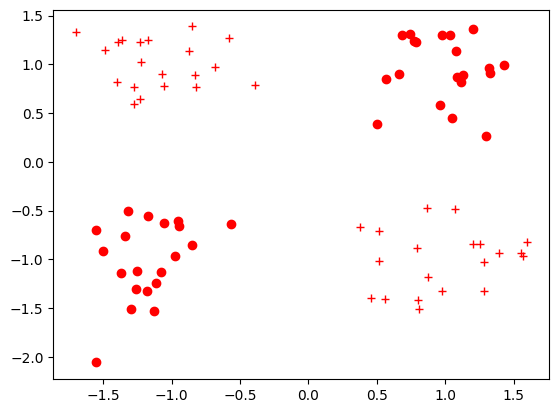

In [47]:
import torch
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

def label_map(y_, from_, to_):
    y = np.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None]*len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [48]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [50]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):

        super(NeuralNet, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output
    
model = NeuralNet(2,5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.7032902240753174


In [51]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.7050145864486694
Train loss at 100 is 0.6572769284248352
Train loss at 200 is 0.6071754097938538
Train loss at 300 is 0.5522602200508118
Train loss at 400 is 0.4934688210487366
Train loss at 500 is 0.4237716794013977
Train loss at 600 is 0.3393455147743225
Train loss at 700 is 0.2707570195198059
Train loss at 800 is 0.2181595116853714
Train loss at 900 is 0.17952866852283478
Train loss at 1000 is 0.1515440046787262
Train loss at 1100 is 0.1303335577249527
Train loss at 1200 is 0.1142568439245224
Train loss at 1300 is 0.10187654197216034
Train loss at 1400 is 0.09183600544929504
Train loss at 1500 is 0.08347488939762115
Train loss at 1600 is 0.0764782577753067
Train loss at 1700 is 0.07054636627435684
Train loss at 1800 is 0.06541784107685089
Train loss at 1900 is 0.0609428696334362


In [52]:
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.06730259954929352


In [53]:
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 0.4734,  0.7131],
        [ 0.0479, -0.1491],
        [ 1.3256,  1.9892],
        [-1.2023,  1.6589],
        [-1.9409, -0.9706]])), ('linear_1.bias', tensor([-0.1003, -0.3279, -0.2801, -0.1362, -0.0378])), ('linear_2.weight', tensor([[-0.8698, -0.2152, -2.2642,  1.9057, -2.0166]])), ('linear_2.bias', tensor([2.0251]))])


In [ ]:
new_model = NeuralNet(2,5)
new_